<a href="https://colab.research.google.com/github/helloworld4774/projects/blob/main/mental_health_in_tech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mental Health in Tech

In [ ]:
import pprint
import sqlite3
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
from plotly.subplots import make_subplots

In [ ]:
con = sqlite3.connect("mental_health.sqlite")
questions_df = pd.read_sql_query("SELECT * from Question", con)
answers_df = pd.read_sql_query("SELECT * from Answer", con)
answers_df.columns = ['AnswerText', 'SurveyID',	'UserID', 'questionid']
surveys_df = pd.read_sql_query("SELECT * from Survey", con)

In [ ]:
display(surveys_df)

,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


In [ ]:
qa = pd.read_sql_query("""SELECT * FROM Question JOIN Answer ON Question.questionid = Answer.questionid""",con)
qa

,questiontext,questionid,AnswerText,SurveyID,UserID,QuestionID
0,What is your age?,1,-1,2014,391,1
1,What is your age?,1,-1,2014,716,1
2,What is your age?,1,-1,2014,1128,1
3,What is your age?,1,-1,2017,3447,1
4,What is your age?,1,-1,2017,3449,1
...,...,...,...,...,...,...
236893,Do you work remotely?,118,Sometimes,2016,2689,118
236894,Do you work remotely?,118,Sometimes,2016,2690,118
236895,Do you work remotely?,118,Sometimes,2016,2691,118
236896,Do you work remotely?,118,Sometimes,2016,2692,118


In [ ]:
# Get a list of all survey years
survey_years = list(surveys_df["SurveyID"])
print("Survey Years: ", survey_years)

Survey Years:  [2014, 2016, 2017, 2018, 2019]


# Gender in Tech

Tech (and STEM as large) has been a male-dominated field for a very long time, Even with corporates actively encouraging females for tech positions via CSR activities, the ratio doesn’t seem to improve.

In the below section we explore this dynamic in the survey. On exploring the dataset we see genders more than just 'male' or 'female'. We plot them on a graph with respect to time, hence showing how certain gender roles may/may not have increased/decreased over time

In [ ]:
gender_through_years = qa.query("questionid == 2")
gender_through_years.groupby("UserID")
display(gender_through_years)

,questiontext,questionid,AnswerText,SurveyID,UserID,QuestionID
4218,What is your gender?,2,-1,2016,1563,2
4219,What is your gender?,2,-1,2016,1904,2
4220,What is your gender?,2,-1,2016,2573,2
4221,What is your gender?,2,-1,2017,2727,2
4222,What is your gender?,2,-1,2017,2732,2
...,...,...,...,...,...,...
8431,What is your gender?,2,something kinda male?,2014,94,2
8432,What is your gender?,2,sometimes,2017,3179,2
8433,What is your gender?,2,trans woman,2017,3346,2
8434,What is your gender?,2,transgender,2018,3628,2


In [ ]:
gender_through_years.AnswerText.unique()

array(['-1', '43', 'A little about you', 'AFAB', 'Agender',
       'Agender trans woman', 'Agender/genderfluid', 'All', 'Androgyne',
       'Androgynous', 'Bigender', 'Cishet male', 'Contextual', 'Demiguy',
       'Enby', 'Female', 'Female (trans)', 'Female assigned at birth',
       'Female or Multi-Gender Femme', 'Female-identified', 'Female-ish',
       'Female/gender non-binary.', 'Fluid', 'Genderfluid',
       'Genderfluid (born female)', 'Genderflux demi-girl', 'Genderqueer',
       'Genderqueer demigirl', 'Genderqueer/non-binary',
       'God King of the Valajar', 'Guy (-ish) ^_^', 'Human',
       'I am a Wookie', 'I have a penis', 'MALE', 'Male',
       'Male (or female, or both)', 'Male (trans, FtM)', 'Male-ish',
       'Male/genderqueer', 'Masculine', 'NB', 'Nah', 'Neuter',
       'Non binary', 'Non-binary', 'Non-binary and gender fluid',
       'Nonbinary', 'Nonbinary/femme', 'None', 'Ostensibly Male', 'Other',
       'Other/Transfeminine', 'Queer', 'Questioning', 'SWM',
   

In [ ]:
temp_groupby = None
gender_distribution = {
    "male": [0, 0, 0, 0, 0],
    "female": [0, 0, 0, 0, 0],
    "transgender": [0, 0, 0, 0, 0],
    "non_binary": [0, 0, 0, 0, 0],
    "queer": [0, 0, 0, 0, 0],
    "gender_fluid": [0, 0, 0, 0, 0],
    "other": [0, 0, 0, 0, 0]
}

for idx, year in enumerate(surveys_df["SurveyID"]):
    temp = gender_through_years[gender_through_years["SurveyID"] == year]
    temp_groupby = temp.groupby('AnswerText').count()
    for answer, row in temp_groupby.iterrows():

        if "trans" in answer.lower() or "ftm" in answer.lower() or "mtf" in answer.lower():                     # Using short formms to catch all cases.
            gender_distribution["transgender"][idx] = gender_distribution["transgender"][idx] + row[1]
        elif "fluid" in answer.lower():
            gender_distribution["gender_fluid"][idx] = gender_distribution["gender_fluid"][idx] + row[1]
        elif "female" in answer.lower() or "she" in answer.lower() or "femina" in answer.lower():
            gender_distribution["female"][idx] = gender_distribution["female"][idx] + row[1]
        elif ("non" in answer.lower() and "binary" in answer.lower()) or "nb" in answer.lower():
            gender_distribution["non_binary"][idx] = gender_distribution["non_binary"][idx] + row[1]
        elif "queer" in answer.lower():
            gender_distribution["queer"][idx] = gender_distribution["queer"][idx] + row[1]
        elif "male" in answer.lower() or "guy" in answer.lower() or "swm" in answer.lower() or "masculino" in answer.lower():
            gender_distribution["male"][idx] = gender_distribution["male"][idx] + row[1]
        else:
            gender_distribution["other"][idx] = gender_distribution["other"][idx] + row[1]


However, bfore we plot the graph, we take a look at the bare numbers that make up the graph.

Each row represent the top genders which are manually selected.
Inside each row is a list of numbers which corresponds to the total participants of the gender who took the survey the corresponding year (2014, 2016, 2017, 2018, and 2019).

In [ ]:
print(f"Gender distribution: \n")
pprint.pprint(gender_distribution)

Gender distribution: 

{'female': [248, 340, 219, 128, 100],
 'gender_fluid': [1, 3, 2, 2, 1],
 'male': [996, 1057, 504, 269, 228],
 'non_binary': [2, 8, 8, 5, 4],
 'other': [7, 15, 19, 7, 16],
 'queer': [2, 5, 2, 2, 0],
 'transgender': [4, 5, 2, 4, 3]}


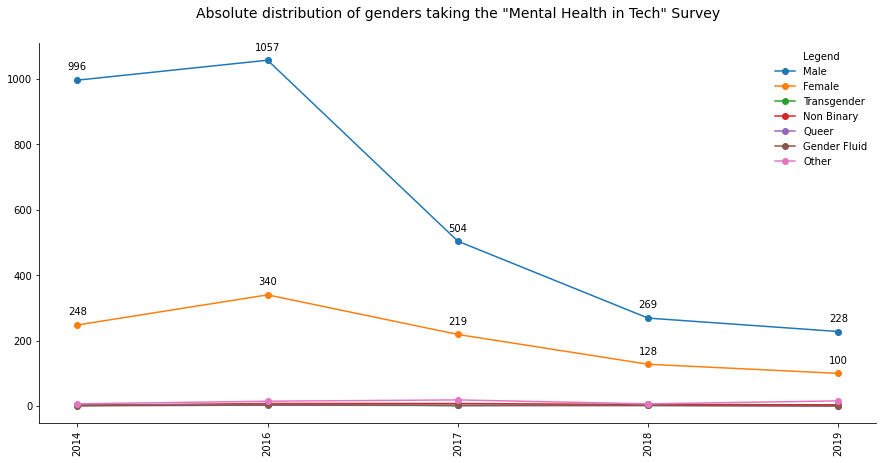

In [ ]:
plt.figure(figsize=(15,7))
for key in gender_distribution.keys():
    plt.plot(gender_distribution.get(key), "o-",
             label=key.title().replace("_", " "))
    if key is "male" or key is "female": # Annotating points only for male and
                                        # female as the other numbers are few
        for x in range(len(survey_years)):
            plt.annotate(gender_distribution.get(key)[x], # this is the text
                         (x, gender_distribution.get(key)[x]), # these are the coordinates to position the label
                         textcoords="offset points", # how to position the text
                         xytext=(0,10), # distance from text to points (x,y)
                         ha='center') # horizontal alignment can be left, right or center


plt.legend(title="Legend", frameon=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(range(len(survey_years)), survey_years, rotation=90)
plt.title(label="Absolute distribution of genders taking the \"Mental Health in Tech\" Survey",
          fontsize=14,
          y=1.05
         )
plt.show()

In the graph above we see that the number of total participants has significantly decreased over the years, majority of whom are male. The number of women taking the survey mainly remain constant. Number of people of other genders are very low and it is difficult to establish any pattern as they reamain low throughout the time period.

# Age groups taking the survey
We tried extracting some information about the age of participants in the survey, including but not limited to the youngest, oldest, and the median age of the participants.

However, the data provided was dirty and this insight could not be derived very easily. This is because below we see the maximum age entered by user 364 is **329**, which makes it rather unbelievable. Similarly, the minimum age entered is **-99**, which again is difficult to believe. This is why you always implement end user validation.

The cells below has the 20 largest smallest and largest data points, some of which makes believing them difficult, if not straight up impossible.

In [ ]:
age_group = qa.query("questionid == 1")[["SurveyID", "AnswerText"]]
print("-"*50, "\nBefore Filtering\n", "-"*50, sep="")
print(f"Minimum age: ", age_group["AnswerText"].astype("int").min())
print(f"Maximum age: ", age_group["AnswerText"].astype("int").max())
print(f"Mean age: ", round(age_group["AnswerText"].astype("int").mean(), 2))
print(f"Median age: ", age_group["AnswerText"].astype("int").median())
print()

x = age_group[(age_group.SurveyID == year) &
                               (age_group.AnswerText.astype("int") >= 15) &
                               (age_group.AnswerText.astype("int") <= 90)]
print("-"*50, "\nAfter Filtering\n", "-"*50, sep="")
print(f"Minimum age: ", x["AnswerText"].astype("int").min())
print(f"Maximum age: ", x["AnswerText"].astype("int").max())
print(f"Mean age: ", round(x["AnswerText"].astype("int").mean(), 2))
print(f"Median age: ", x["AnswerText"].astype("int").median())

--------------------------------------------------
Before Filtering
--------------------------------------------------
Minimum age:  -29
Maximum age:  329
Mean age:  33.92
Median age:  33.0

--------------------------------------------------
After Filtering
--------------------------------------------------
Minimum age:  19
Maximum age:  64
Mean age:  35.6
Median age:  34.0


We notice that even though the maximum and minimum age changes the median and mean remain almost unchanged, albeit shifting towards the right a bit.

Next, we plot these values onto charts, depending on year-wise to see the distribution of ages.

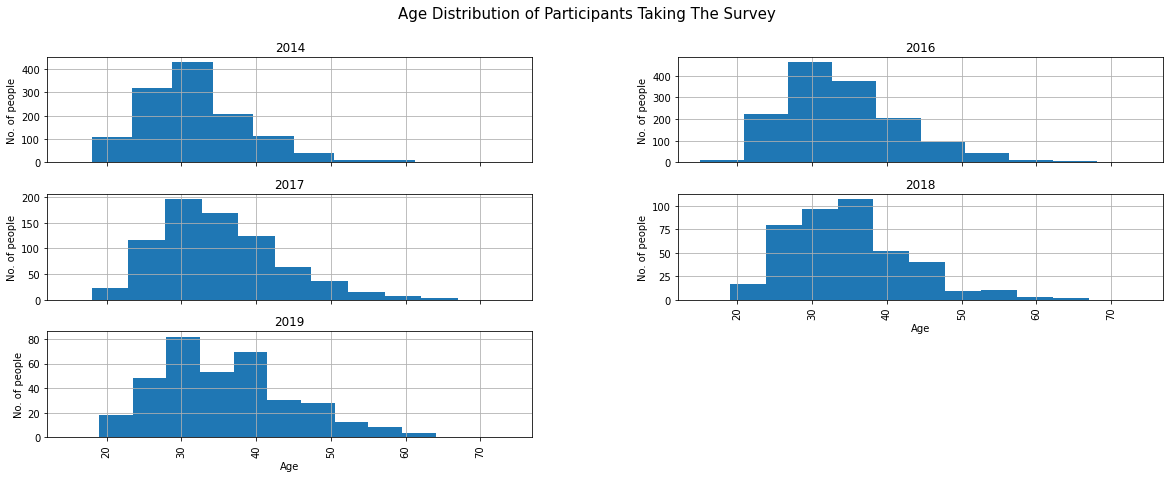

In [ ]:
age_group = qa.query("questionid == 1")[["SurveyID", "AnswerText"]]
age_dict = {}

for year in survey_years:
#     print("Working with year: ", year)
    age_dict[year] = age_group[(age_group.SurveyID == year) & \
                               (age_group.AnswerText.astype("int") >= 15) &
                               (age_group.AnswerText.astype("int") <= 90)] \
                        .AnswerText.astype("int").sort_values().tolist()

axarr = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in age_dict.items() ])) \
        .hist(
            figsize=(20,7),
            xrot=90,sharex=True
        )
for ax in axarr.flatten():
    ax.set_xlabel("Age")
    ax.set_ylabel("No. of people")

plt.suptitle("Age Distribution of Participants Taking The Survey", fontsize=15)

# Countries taking the survey

The Mental Health in Tech Survey was published interantionally with a lot of countries taking part. We have a total of 80 countries over the course of six years. Some of these countries have very significant number of participants while others have very less.

The below table shows the top 5 and bottom 5 countries taking part in the survey.

In [ ]:
country_df = qa.query("questionid == 3")[["SurveyID", "AnswerText"]]
#country_df
country_dict = {}
for year in survey_years:
    print("Working with year: ", year)
    year_country_df = country_df[(country_df.SurveyID == year)]
    value_counts = year_country_df.value_counts()
    temp_dict = {}

    for country_name, country_no in zip(value_counts.index, value_counts):
        country_name = country_name[1]  ## Subscript [1] is used to deal with
        ## the multi index part. Print the following to understand better:
        year_country_df.value_counts().index

# Handle USA separately since the name changed in the survey and both the
# values are present in the answer
        if country_name == "United States" or country_name == "United States of America":
          temp_dict["USA"] = int(country_no)

        else:
            temp_dict[country_name] = int(country_no)

    country_dict[year] = temp_dict
    break

country_df = pd.DataFrame(country_dict)
country_df.to_csv("./Countries taking the survey.csv", index=False)
display(country_df)

Working with year:  2014
Working with year:  2016
Working with year:  2017
Working with year:  2018
Working with year:  2019


,2014,2016,2017,2018,2019
USA,751.0,840.0,497.0,312.0,204.0
United Kingdom,185.0,180.0,66.0,19.0,32.0
Canada,72.0,78.0,26.0,8.0,15.0
Germany,45.0,58.0,22.0,7.0,4.0
Netherlands,27.0,48.0,14.0,5.0,4.0
...,...,...,...,...,...
Mauritius,NaN,NaN,NaN,1.0,NaN
Macedonia,NaN,NaN,NaN,1.0,NaN
Hong Kong,NaN,NaN,NaN,1.0,1.0
Ethiopia,NaN,NaN,NaN,1.0,NaN


Since plotting so many country data on a plot will virtually make the graph unreadable, we decided to plot the top 5 countries for each year. The below graphs display the same.

On hovering over the graph we get a pop-up of the country and the number of people taking part from that country in that year.

In [ ]:
for column in country_df.columns:
    print("Working with column: ", column)
    count_df = country_df[column] \
                .sort_values(ascending=False) \
                .head(5)
    count_df_others_sum = count_df[6:].sum()
    temp_df = count_df.head(5)
    temp_df.loc["Others"] = count_df_others_sum
    print(temp_df)

    fig = px.pie(temp_df,
            values=column,
            names=temp_df.index,
            title="Top 5 countries taking the survey "+str(column),
            labels={
                "index":"Country"
            })
    fig.update_traces(textposition='inside',textinfo='percent+label')
    # fig.write_image("./Top 5 countries taking the survey every year_"+str(column)+".png")
    fig.update_layout(template="plotly_dark")
    fig.show()

Working with column:  2014
USA               751.0
United Kingdom    185.0
Canada             72.0
Germany            45.0
Netherlands        27.0
Others              0.0
Name: 2014, dtype: float64


Working with column:  2016
USA               840.0
United Kingdom    180.0
Canada             78.0
Germany            58.0
Netherlands        48.0
Others              0.0
Name: 2016, dtype: float64


Working with column:  2017
USA               497.0
United Kingdom     66.0
Canada             26.0
Germany            22.0
France             17.0
Others              0.0
Name: 2017, dtype: float64


Working with column:  2018
USA               312.0
United Kingdom     19.0
Canada              8.0
Germany             7.0
Poland              6.0
Others              0.0
Name: 2018, dtype: float64


Working with column:  2019
USA               204.0
United Kingdom     32.0
Portugal           18.0
Brazil             17.0
Canada             15.0
Others              0.0
Name: 2019, dtype: float64


# How many people are actually willing to seek out treatment?



In [ ]:
seek_help_yoy = qa.query("questionid == 7")
seek_help_yoy

,questiontext,questionid,AnswerText,SurveyID,UserID,QuestionID
25308,Have you ever sought treatment for a mental he...,7,0,2014,2,7
25309,Have you ever sought treatment for a mental he...,7,0,2014,3,7
25310,Have you ever sought treatment for a mental he...,7,0,2014,5,7
25311,Have you ever sought treatment for a mental he...,7,0,2014,6,7
25312,Have you ever sought treatment for a mental he...,7,0,2014,8,7
...,...,...,...,...,...,...
29521,Have you ever sought treatment for a mental he...,7,1,2019,4209,7
29522,Have you ever sought treatment for a mental he...,7,1,2019,4210,7
29523,Have you ever sought treatment for a mental he...,7,1,2019,4211,7
29524,Have you ever sought treatment for a mental he...,7,1,2019,4212,7


In [ ]:
percent_yoy = []
tot_yoy = []
for year in survey_years:
    tmp = seek_help_yoy[(seek_help_yoy.SurveyID == year)][["AnswerText", "UserID", "SurveyID"]]
    tmp2 = tmp.AnswerText.value_counts()

    percent_yoy.append((tmp2.loc["1"] / (tmp2.loc["1"]+tmp2.loc["0"])) * 100)    # Percentage of participant each year who seeked help
    tot_yoy.append((tmp2.loc["1"]+tmp2.loc["0"]))                                # Total no.  of participant each year who took part
    display(tmp2)

1    637
0    623
Name: AnswerText, dtype: int64

1    839
0    594
Name: AnswerText, dtype: int64

1    456
0    300
Name: AnswerText, dtype: int64

1    263
0    154
Name: AnswerText, dtype: int64

1    217
0    135
Name: AnswerText, dtype: int64

In [ ]:
fig = px.line(x=survey_years, y=percent_yoy,
             labels=dict(x="Year", y="% people seeking help", color="Time Period"))
# fig.update_traces(textposition='inside')
fig.add_bar(x=survey_years, y=percent_yoy, name="% people seeking help")
fig.update_layout(title_text="% of participants seeking help YoY")
fig.update_layout(showlegend=False)
fig.show()

In the chart below we explore this question in some depth. How many people are actually willing to seek out mental health treatment? The blue line indicates people who seek out help while the red line signifies the total number of person, giving us a baseline to measure against.

We observe that as years go on the percent of people seeking out help for mental health increases even though the total number of people taking the survey decreased. One explanation for this can be as the total number decreases the percent value increases with time. With sufficient dat, this hypothesis could be proven, or, disproven

In [ ]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=survey_years, y=percent_yoy, name="% of participants seeking help"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=survey_years, y=tot_yoy, name="No. of participants"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Percent of participants seeking help by Year",
    template="plotly_dark"
)

# Set x-axis title
fig.update_xaxes(title_text="Survey Year")

# Set y-axes titles
fig.update_yaxes(title_text="% of participants seeking help", secondary_y=False)
fig.update_yaxes(title_text="No. of participants", secondary_y=True)

fig.show()

# Employment status  - self employed vs employed by a corporate enterprise. Do corporates harm mental health more?

A conventional belief is that people working in enterprises are more likely to fall victim to mental health related issues. We take upon ourselves to explore this notion in the section below. Does working in an enterprise really cause more mental health issues? We have ignored the enterprise size herein and this could be taken up at a later point of time.

In [ ]:
employment_df = qa.query("questionid == 5")[["AnswerText", "UserID"]].set_index('UserID')
employment_df = employment_df[employment_df['AnswerText'] != '-1']
display(employment_df)
type(employment_df)
display(employment_df.describe(include='all'))
display(employment_df.value_counts())

print(f"How many total people work in an enterprise: {employment_df.value_counts()[0]}")
print(f"How many total people are self employed: {employment_df.value_counts()[1]}")

,AnswerText
UserID,
21,0
23,0
24,0
25,0
26,0
...,...
4183,1
4185,1
4210,1


,AnswerText
count,4200
unique,2
top,0
freq,3550


AnswerText
0             3550
1              650
dtype: int64

How many total people work in an enterprise: 3550
How many total people are self employed: 650


As we see most people work in an enterprise, the datasets are imbalanced.
We will now find out how many people are diagnosed:

In [ ]:
diagnosed_df = qa.query("questionid == 34")[["AnswerText", "UserID"]].set_index('UserID')
diagnosed_df = diagnosed_df[diagnosed_df['AnswerText'] != '-1']                                # Only consider Yes/No answers
display(diagnosed_df)
display(diagnosed_df.describe())
display(diagnosed_df.value_counts())

print(f"No. of people diagnosed with a mental health illness: {diagnosed_df.value_counts()[0]}")
print(f"No. of people NOT diagnosed with a mental health illness: {diagnosed_df.value_counts()[1]}")

,AnswerText
UserID,
1263,No
1266,No
1267,No
1274,No
1278,No
...,...
4204,Yes
4209,Yes
4210,Yes


,AnswerText
count,2095
unique,2
top,Yes
freq,1363


AnswerText
Yes           1363
No             732
dtype: int64

No. of people diagnosed with a mental health illness: 1363
No. of people NOT diagnosed with a mental health illness: 732


As we see agin the number of people diagnosed with a mental illness is almost double of that of people not diagnosed

In [ ]:
# Join employment with diagnosed and group by on employment
emp_diag_join = employment_df.join(diagnosed_df,
                     on="UserID",
                     how="inner",
                     lsuffix="_employment",
                     rsuffix='_diagnosed')
# Drop the index
emp_diag_join.reset_index(drop=True, inplace=True)

Now, we are going to get all the combinations of people who are either working in an enterprise and/or are diagnosed with a mental health illness

In [ ]:
# Separate all the values
corp_diag = emp_diag_join.value_counts()[0]
print(f"Enterprise and diagnosed: {corp_diag}")
corp_notdiag = emp_diag_join.value_counts()[1]
print(f"Enterprise and not diagnosed: {corp_notdiag}")

self_diag = emp_diag_join.value_counts()[2]
print(f"Self employed and diagnosed: {self_diag}")

self_notdiag = emp_diag_join.value_counts()[3]
print(f"Self employed and not diagnosed: {self_notdiag}")

Enterprise and diagnosed: 1128
Enterprise and not diagnosed: 591
Self employed and diagnosed: 235
Self employed and not diagnosed: 141


Finally, to complete this analysis we plot them on a chart where the x-axis represents whether or not the person works at an enterprise.

The y-axis represents the number of people either diagnosed or not diagnosed, stacked on top of each other to give us a better vizualization of the total number.



In [ ]:
fig = px.bar([[corp_diag, corp_notdiag], [self_diag, self_notdiag]],
            labels={
                "variable":"Diagnosed",
                "value":"Count",
                "index":"Self employed?"
            })

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1],
        ticktext = ['Working at a corporate', 'Self employed']
    ),
    title="Does working in a corporate cause more mental health issues?",
    xaxis_title="",
    yaxis_title="Count",

    template="plotly_dark"
)

fig.update_layout(showlegend=False)
fig.show()

Lastly, we plot a correlation matrix using Seaborn to see if there is any correlation between working at an enterprise and having been diagnosed with a mental health disorder: there is not as per this data set

In [ ]:
px.imshow(emp_diag_join.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1))